# This notebook is read only (cannot be saved).  Use File -> Make a Copy before starting.  (this will save it as notebook name-Copy1)

Neon Atomic Orbitals and Basis Set Exploration

Based on an excellent post by Jacob Martin at:  http://nznano.blogspot.com/2018/03/simple-quantum-chemistry-hartree-fock.html

Also based on a very helpful basis set overview by C. David Sherrill:  http://vergil.chemistry.gatech.edu/courses/chem6485/pdf/basis-sets.pdf

Define a Neon atom.  Don't use symmetry because that complicates the orbitals.  (C1 symmetry means no symmetry)
Calculate its energy and write out details to a file (Ne.molden).

In [1]:
import psi4
psi4.set_memory('500 MB')

h2o = psi4.geometry("""
0 1
Ne 0 0 0
symmetry c1
""")

#psi4.set_options({'reference':'uhf'})
e, wfn = psi4.energy('scf/sto-3g', return_wfn=True)

psi4.molden(wfn,'Ne.molden')


  Memory set to 476.837 MiB by Python driver.

Scratch directory: /tmp/

Scratch directory: /tmp/

*** tstart() called on lab-203-2
*** at Thu Oct 21 08:57:44 2021

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry NE         line   101 file /home/emejia/psi4conda/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  --------------

The molden file we wrote has the basis set and coefficients in an "easy to read" format

In [2]:
!cat Ne.molden


eciprocal condition number of the overlap matrix is 6.0929314156E-01.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Core (One-Electron) Hamiltonian.

   -------------------------------------------------------
    Irrep   Nso     Nmo     Nalpha   Nbeta   Ndocc  Nsocc
   -------------------------------------------------------
     A          5       5       5       5       5       0
   -------------------------------------------------------
    Total       5       5       5       5       5       0
   -------------------------------------------------------

  ==> Iterations <==

                           Total Energy        Delta E     RMS |[F,P]|

   @DF-RHF iter   1:  -126.60457333960841   -1.26605e+02   3.10755e-15 DIIS
   @DF-RHF iter   2:  -126.60457333960846   -5.68434e-14   3.20516e-15 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                    

wfn.Ca() also gives the coefficients of alpha spin electrons.  If we use RHF these are the same as beta.  .nph is a way to display them

In [3]:
import numpy as np
wfn.Ca().nph

(array([[ 9.95014821e-01,  2.69407350e-01, -5.34979918e-16,
          3.38058526e-16,  7.03595130e-16],
        [ 1.97755915e-02, -1.03065209e+00,  2.42300613e-15,
         -1.35762497e-15, -2.56694377e-15],
        [-1.04108820e-16,  2.43783657e-15,  9.99971457e-01,
          6.99529222e-03,  2.85486659e-03],
        [ 3.98551743e-17, -2.71157326e-15, -2.89284825e-03,
          5.42551367e-03,  9.99981097e-01],
        [-1.94219125e-17,  1.32620447e-15,  6.97967088e-03,
         -9.99960814e-01,  5.44559513e-03]]),)

To plot our basis functions and orbitals we setup matplotlib and define x,y,z, and r coordinates

In [4]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-5,5,num=1000)
y = np.linspace(-5,5,num=1000)
z = np.linspace(-5,5,num=1000)

r = abs(x)


The first s GTO is defined by:  (The exponents are first and the coefficients are second)

    s    3  1.00
          207.0156100000         0.1543289700
           37.7081510000         0.5353281400
           10.2052970000         0.4446345400

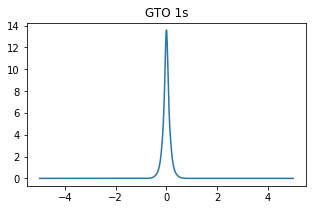

In [5]:
GTO_1s = 0.1543289700*(2*207.0156100000/np.pi)**(0.75)*np.exp(-207.0156100000*r**2) \
                + 0.5353281400*(2*37.7081510000/np.pi)**(0.75)*np.exp(-37.7081510000*r**2) \
                + 0.4446345400*(2*10.2052970000 /np.pi)**(0.75)*np.exp(-10.2052970000 *r**2)
    
plt.figure(figsize=(5,3))
plt.title("GTO 1s")
plt.plot(x,GTO_1s)


Let's define a function for the radial distribution of the 1s AO.

In [6]:
def R_1s(r):
    psi_1s =  0.1543289700*(2*207.0156100000/np.pi)**(0.75)*np.exp(-207.0156100000*r**2) \
            + 0.5353281400*(2*37.7081510000/np.pi)**(0.75)*np.exp(-37.7081510000*r**2) \
            + 0.4446345400*(2*10.2052970000 /np.pi)**(0.75)*np.exp(-10.2052970000 *r**2)
    
    return 4*np.pi*r**2*psi_1s**2

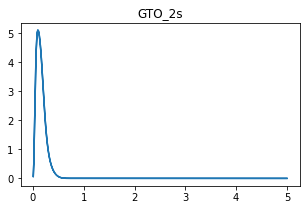

In [7]:
plt.figure(figsize=(5,3))
plt.title("GTO_2s")
plt.plot(r,R_1s(r))

You can look on the plot to see how far the 1s orbital extends.  Verify that it goes out to about 0.5.  The units of length is the bohr.  (The distance of the electron in hydrogen).  So 0.5 means half the radius of an electron in hydrogen.

We can integrate to show this mathematically.  First let's see if it's normalized.  Integrate it from 0 to 10.  This is pretty much infinity.

In [8]:
from scipy import integrate
integrate.quad(R_1s,0,10)

(0.9999999890536202, 7.843383236934265e-11)

The first value is the integral (1 means this function is normalized).  The second value is the integration error.  Let's see what the integral is from 0 to 0.5

In [9]:
integrate.quad(R_1s,0,0.5)

(0.996649998327564, 6.151979972411205e-14)

This means that 99.7% of the orbital is found between 0 and 0.5.

The second s STO is defined by:  (The exponents are first and the coefficients are second)

     s    3  1.00
            8.2463151000        -0.0999672300
            1.9162662000         0.3995128300
            0.6232293000         0.7001154700

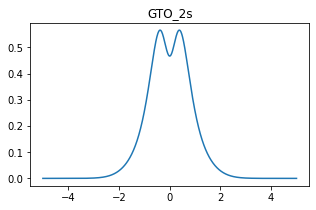

In [10]:
GTO_2s = -0.0999672300*(2*8.2463151000/np.pi)**(0.75)*np.exp(-8.2463151000*r**2) \
                + 0.3995128300*(2*1.9162662000/np.pi)**(0.75)*np.exp(-1.9162662000*r**2) \
                +  0.7001154700*(2*0.6232293000/np.pi)**(0.75)*np.exp(-0.6232293000*r**2)

plt.figure(figsize=(5,3))
plt.title("GTO_2s")
plt.plot(x,GTO_2s)

This is weird.  The 2s AO doesn't look like this.  Most of the AOs are simply the GTOs (the coeffiecient is 1).  But the 2s AO needs a radial node, and the GTOs don't have any.  So the 2s AO is defined as a Linear Combination of the GTO_1s and GTO_2s functions.  You can see the coefficients in the Molden File under the second orbital:

     Sym= A
     Ene= -1.70608008491765339e+00
     Spin= Alpha
     Occup=  2.00000000000000000e+00
      1  2.69407349843027555e-01
      2 -1.03065209431487670e+00
      3 -1.53722094003921071e-15
      4 -7.38693396902810166e-16
      5 -1.39519597842396162e-15

We can use these coefficients and plot its radial distribution function to see the radial node.

In [11]:
psi_2s = 2.69407349843027555e-01 * GTO_1s + -1.03065209431487670e+00 * GTO_2s

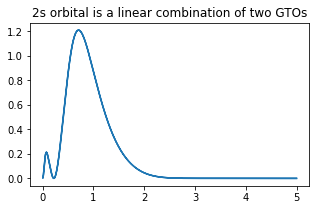

In [12]:
plt.figure(figsize=(5,3))
plt.title("2s orbital is a linear combination of two GTOs")
plt.plot(r,4*np.pi*r**2*psi_2s**2)

Visually estimate the radius of the 2s orbital from the graph.

The p GTOs are defined by:

    p    3  1.00
            8.2463151000         0.1559162700
            1.9162662000         0.6076837200
            0.6232293000         0.3919573900

The 2p AOs have a node at the origin and are + and - on each side.  Always remember that this is just the sign of the wavefunction and has nothing to do with the charge!  The wavefunction represent the position of electrons and their charge is always negative!

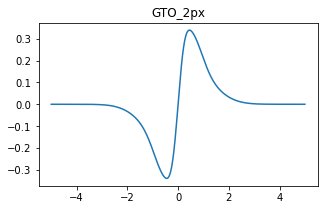

In [13]:

psi_2px = 0.1559162700*x*(2*8.2463151000/np.pi)**(0.75)*np.exp(-8.2463151000*r**2) \
                +  0.6076837200*x*(2*1.9162662000/np.pi)**(0.75)*np.exp(-1.9162662000*r**2) \
                +  0.3919573900*x*(2*0.6232293000 /np.pi)**(0.75)*np.exp(-0.6232293000*r**2)

psi_2py = 0.1559162700*y*(2*8.2463151000/np.pi)**(0.75)*np.exp(-8.2463151000*r**2) \
                +  0.6076837200*y*(2*1.9162662000/np.pi)**(0.75)*np.exp(-1.9162662000*r**2) \
                +  0.3919573900*y*(2*0.6232293000 /np.pi)**(0.75)*np.exp(-0.6232293000*r**2)

psi_2pz = 0.1559162700*z*(2*8.2463151000/np.pi)**(0.75)*np.exp(-8.2463151000*r**2) \
                +  0.6076837200*z*(2*1.9162662000/np.pi)**(0.75)*np.exp(-1.9162662000*r**2) \
                +  0.3919573900*z*(2*0.6232293000 /np.pi)**(0.75)*np.exp(-0.6232293000*r**2)

plt.figure(figsize=(5,3))
plt.title("GTO_2px")
plt.plot(x,psi_2px)

We can use JSmol to display these orbitals now.  Right click on the JSmol window, select surfaces, and Molecular Orbitals to view different atomic orbitals.

In [14]:
from jupyter_jsmol import JsmolView
view1 = JsmolView.from_file("Ne.molden", inline=False) 
view1

JsmolView(layout=Layout(align_self='stretch', height='400px'))

You can also use the JSmol script language to look at different orbitals.

In [15]:
view1.script('mo 4')